In [3]:
#install dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the dataset
df=pd.read_csv("/content/drive/MyDrive/NFLX.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


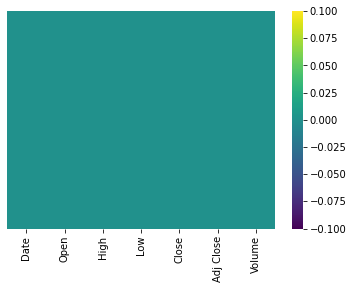

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [8]:
#get the no of trading days
df.shape

(1009, 7)

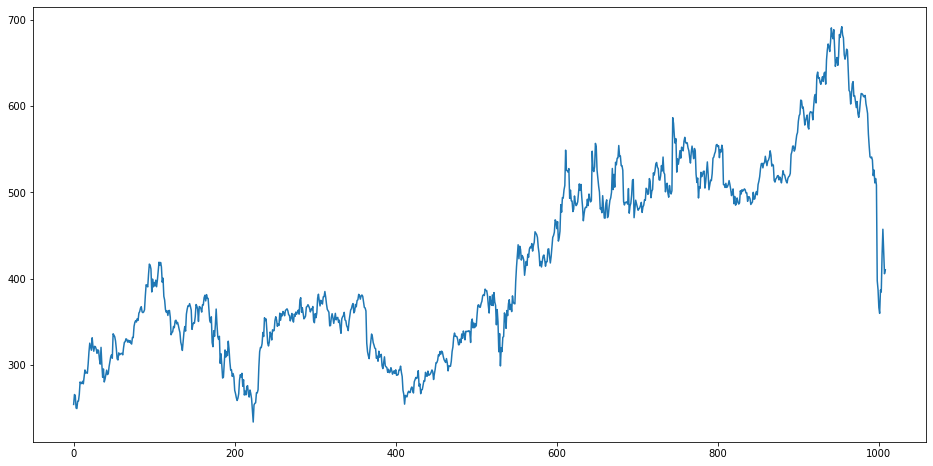

In [9]:
plt.figure(figsize=(16,8))
plt.title=('Netflix')
plt.xlabel=('days')
plt.ylabel=('close price USD')
plt.plot(df['Close'])
plt.show()

In [10]:
#get the  close price
df=df[['Close']]
df.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [11]:
#create a variable to predict x days future
fut_days=25
df['Prediction']=df[['Close']].shift(-fut_days)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Prediction
0,254.259995,315.880005
1,265.720001,321.549988
2,264.559998,321.089996
3,250.100006,318.450012
4,249.470001,313.480011


In [12]:
x=np.array(df.drop(['Prediction'],1))[:-fut_days]
print(x)
x.shape

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(984, 1)

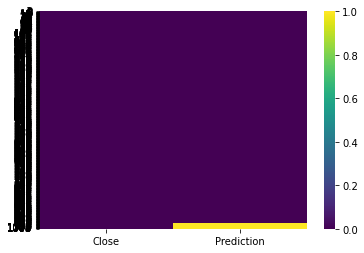

In [13]:
sns.heatmap(df.isnull(),yticklabels=True,cmap='viridis')

In [14]:
y=np.array(df['Prediction'])[:-fut_days]
print(y)
y.shape

[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


(984,)

In [24]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [30]:
# creating models
#decision tree regressor
Tree=DecisionTreeRegressor().fit(x_train,y_train)
#Linear regressor
LR=LinearRegression().fit(x_train,y_train)

In [31]:
x_train.shape

(738, 1)

In [32]:
y_train.shape

(738,)

In [33]:
x_future= df.drop(['Prediction'],1)[:-fut_days]
x_future= x_future.tail(fut_days)
x_future=np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [35]:
tree_pred=Tree.predict(x_future)
print(tree_pred)

LR_pred=LR.predict(x_future)
print(LR_pred)

[586.72998  663.840027 616.469971 567.52002  541.059998 541.059998
 539.849976 540.840027 537.219971 678.799988 525.690002 410.170013
 515.859985 508.25     386.700012 387.149994 366.420013 359.700012
 386.700012 384.359985 427.140015 645.719971 429.480011 405.600006
 410.170013]
[638.98541603 645.58879063 643.97165659 624.26045535 602.58172701
 601.41374506 588.53052187 598.01776879 609.59833601 611.84437049
 596.49944769 597.09237653 590.71366109 584.8110753  591.14488174
 578.58507493 574.69492705 580.9928167  591.03707658 599.41029938
 599.27557056 598.40408043 596.23892746 596.08615758 597.47874298]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


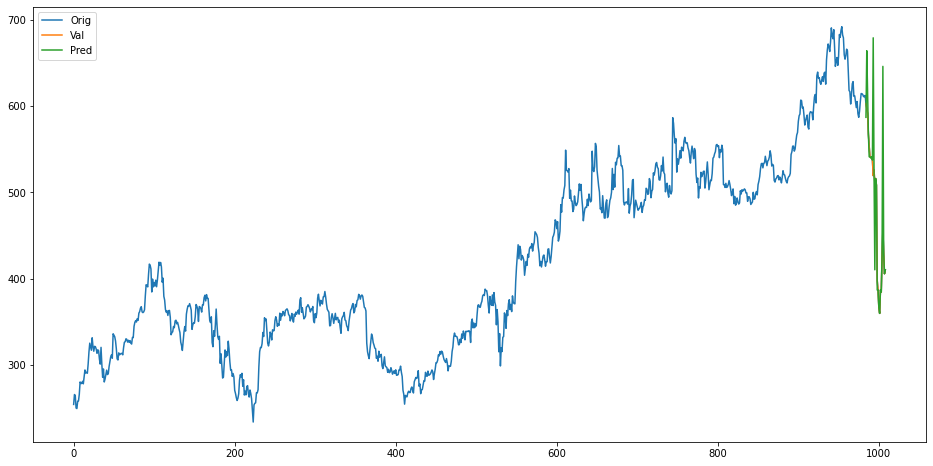

In [46]:
predict=tree_pred

valid=df[x.shape[0]:]
valid['Prediction']=predict
plt.figure(figsize=(16,8))
#del str
#plt.title('Model')
#plt.xlabel('Days')
#plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


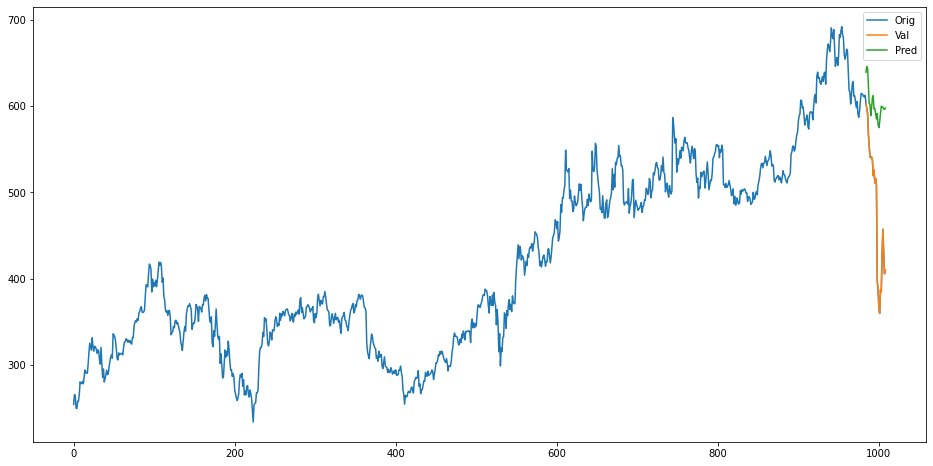

In [47]:
predict=LR_pred

valid=df[x.shape[0]:]
valid['Prediction']=predict
plt.figure(figsize=(16,8))
#del str
#plt.title('Model')
#plt.xlabel('Days')
#plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()